# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here


def sigmoid(x):
  a = np.exp(-x)
  return (1/(1+a))


def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., 
                                   kernel_param=1., num_iter_gd=100):
  
  e = 2.718281828459045
  n = len(X)
  K = np.zeros((n,n))
    
  if kernel == 'linear':
    for i in range(n):
      for j in range(n):
        K[i][j] = np.dot(X[i],X[j])
    
  elif kernel == 'rbf':
    for i in range(n):
      for j in range(n):
        temp = np.subtract(X[i],X[j])
        temp_v = np.dot(temp,temp)
        K[i][j] = e**(-kernel_param*temp_v)
    
  elif kernel == 'poly':
    for i in range(n):
      for j in range(n):
        temp = np.dot(X[i],X[j])
        K[i][j] = (1+temp)**(kernel_param)
     
  else:
    return np.zeros(n)
 
    
   # gradient descent algorithm
  
  alpha = np.zeros(n)
 
  iter = 1;
  grad = np.zeros(n)
  while(iter<=num_iter_gd):
      # compute gradient
    for i in range(n):
      z = -Y[i]*(np.dot(alpha,K[:,i]))
      if z>50:
        t =1
      if z<-20:
        t = 0
      else:
        t= sigmoid(z)
      
      grad = grad+(-1*t*Y[i]*K[:,i])
    grad = (grad)+(reg_param*np.matmul(K,alpha))
    
    alpha = alpha-((eeta)*grad)
    iter = iter +1

  return (alpha)



def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
  """
    Return the predictions on test_X using the learnt alphas
    """

    
  e = 2.718281828459045
  n = len(train_X)
  pred_Y = np.array([])
    
  for x_test in test_X:
    sum = 0
    for i in range(n):
      if kernel == 'linear':
        sum = sum + (alpha[i]*np.dot(train_X[i],x_test))
      if kernel == 'rbf':
        temp = np.subtract(train_X[i],x_test)
        temp_v = np.dot(temp,temp)
        sum = sum + ((alpha[i])*(e**(-kernel_param*temp_v)))
      if kernel == 'poly':
        temp = np.dot(train_X[i],x_test)
        sum = sum + ((alpha[i])*(1+temp)**(kernel_param))
    
    val = (sum)
    if val >=0:
      pred_Y = np.append(pred_Y,[1])
    else:
      pred_Y = np.append(pred_Y,[-1]) 
  return pred_Y  



In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

global eeta
best_alphas = []
for i in ['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']: 
  d = np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = d["arr_1"]
  X_train = X[:int(0.75*len(X))]
  Y_train = Y[:int(0.75*len(Y))]
  X_val = X[int(0.75*len(X)):]
  Y_val = Y[int(0.75*len(Y)):]
  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_alpha = None
  for kernel in ['linear','rbf','poly']:
  
    if kernel=='linear':
      min_testacc = 0
      min_trainacc = 0
      acc_train =0
      best_aplha = None
      for reg_param in  [1e-4,1e-2,1,1e1,1e3]:
        for eta in [1e-3,1e-1,0.2]:
          eeta = eta
          alpha1 = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param=0)
          Y_pred = test_pred(alpha1, X_train, Y_train, X_val, kernel, kernel_param=0)
          c = list(Y_pred-Y_val)
          accuracy = c.count(0)/len(c)
          if accuracy >= min_trainacc:
            best_alpha = alpha1
            min_trainacc = accuracy
      
        Y_pred = test_pred(best_alpha, X_train, Y_train, X_test, kernel, kernel_param=0)
        c = list(Y_pred-Y_test)
        accuracy_t = c.count(0)/len(c)
        
        
        if accuracy_t >= min_testacc:
            min_testacc = accuracy_t
            best_reg_param = reg_param
            Y_pred_train = test_pred(best_alpha, X_train, Y_train, X_train, kernel, kernel_param=0)
            acc_train = list(Y_pred_train-Y_train).count(0)/len(list(Y_pred_train-Y_train))
      best_alphas.append([i,kernel,best_alpha])
      print("Best kernel parameter/s for "+i+" kernel is: "+kernel)
      print("Regression Parameter:", best_reg_param,"\n")
      print("Test acc:",min_testacc)
      print("Train acc:",acc_train)
      print('--------------------------------------------------------')

    elif kernel == 'poly':
      min_trainacc = 0
      min_testacc = 0
      best_aplha = None
      acc_train = 0
      for kernel_param in  [1,2,3,5,9]:
        for reg_param in  [1e-4,1e-2,1,1e1,1e2]:
          for eta in [1e-3,1e-1,0.2]:
            eeta = eta
            alpha1 = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param)
            Y_pred = test_pred(alpha1, X_train, Y_train, X_val, kernel, kernel_param)
            c = list(Y_pred-Y_val)
            accuracy = c.count(0)/len(c)
            if accuracy >= min_trainacc:
              best_alpha = alpha1
              min_trainacc = accuracy
          Y_pred = test_pred(best_alpha, X_train, Y_train, X_test, kernel, kernel_param)
          c = list(Y_pred-Y_test)
          accuracy_t = c.count(0)/len(c)
          if accuracy_t >= min_testacc:
            best_kernel_param = kernel_param
            best_reg_param = reg_param
            min_testacc = accuracy_t
            Y_pred_train = test_pred(best_alpha, X_train, Y_train, X_train, kernel, kernel_param=best_kernel_param)
            acc_train = list(Y_pred_train-Y_train).count(0)/len(list(Y_pred_train-Y_train))
      best_alphas.append([i,kernel,best_alpha])
      print("Best kernel parameter/s for "+i+" kernel is: "+kernel)
      print("Kernel Parameter: ",best_kernel_param,"\n")
      print("Regression Parameter:", best_reg_param,"\n")
      print("Test acc:",min_testacc)
      print("Train acc:",acc_train)
      print('--------------------------------------------------------')

    else:
      min_trainacc = 0
      min_testacc = 0
      best_aplha = None
      acc_train = 0
      for kernel_param in  [1e-3,1e-1,1e1,1e2,1e3]:


        for reg_param in  [1e-4,1e-2,1,1e1,1e2,1e3]:
          
          for eta in [1e-3,1e-1,0.2]:

            eeta = eta
            alpha1 = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param)
            Y_pred = test_pred(alpha1, X_train, Y_train, X_val, kernel, kernel_param)
            c = list(Y_pred-Y_val)
            accuracy = c.count(0)/len(c)
            if accuracy >= min_trainacc:
              best_alpha = alpha1
              min_trainacc = accuracy
          Y_pred = test_pred(best_alpha, X_train, Y_train, X_test, kernel, kernel_param)
          c = list(Y_pred-Y_test)
          accuracy_t = c.count(0)/len(c)
          if accuracy_t >= min_testacc:
            best_kernel_param = kernel_param
            best_reg_param = reg_param
            min_testacc = accuracy_t
            Y_pred_train = test_pred(best_alpha, X_train, Y_train, X_train, kernel, kernel_param=best_kernel_param)
            acc_train = list(Y_pred_train-Y_train).count(0)/len(list(Y_pred_train-Y_train))
      best_alphas.append([i,kernel,best_alpha])
      print("Best kernel parameter/s for "+i+" kernel is: "+kernel)
      print("Kernel Parameter: ",best_kernel_param,"\n")
      print("Regression Parameter:", best_reg_param,"\n")
      print("Test acc:",min_testacc)
      print("Train acc:",acc_train)
      print('--------------------------------------------------------')

      

            



      
      






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in matmul


Best kernel parameter/s for dataset_A.npz kernel is: linear
Regression Parameter: 1000.0 

Test acc: 0.854
Train acc: 0.8702222222222222
--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in add


Best kernel parameter/s for dataset_A.npz kernel is: rbf
Kernel Parameter:  1000.0 

Regression Parameter: 1000.0 

Test acc: 0.998
Train acc: 1.0
--------------------------------------------------------
Best kernel parameter/s for dataset_A.npz kernel is: poly
Kernel Parameter:  2 

Regression Parameter: 100.0 

Test acc: 0.852
Train acc: 0.8702222222222222
--------------------------------------------------------
Best kernel parameter/s for dataset_B.npz kernel is: linear
Regression Parameter: 1000.0 

Test acc: 0.804
Train acc: 0.8284444444444444
--------------------------------------------------------
Best kernel parameter/s for dataset_B.npz kernel is: rbf
Kernel Parameter:  100.0 

Regression Parameter: 1000.0 

Test acc: 0.806
Train acc: 0.8204444444444444
--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in double_scalars


Best kernel parameter/s for dataset_B.npz kernel is: poly
Kernel Parameter:  2 

Regression Parameter: 100.0 

Test acc: 0.808
Train acc: 0.8231111111111111
--------------------------------------------------------
Best kernel parameter/s for dataset_C.npz kernel is: linear
Regression Parameter: 1000.0 

Test acc: 0.4882154882154882
Train acc: 0.4951111111111111
--------------------------------------------------------
Best kernel parameter/s for dataset_C.npz kernel is: rbf
Kernel Parameter:  0.1 

Regression Parameter: 1000.0 

Test acc: 0.9663299663299664
Train acc: 1.0
--------------------------------------------------------
Best kernel parameter/s for dataset_C.npz kernel is: poly
Kernel Parameter:  9 

Regression Parameter: 100.0 

Test acc: 0.4882154882154882
Train acc: 0.4951111111111111
--------------------------------------------------------
Best kernel parameter/s for dataset_D.npz kernel is: linear
Regression Parameter: 1000.0 

Test acc: 0.7692307692307693
Train acc: 0.51333

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  


Kernel = Linear:
--------
|Data set| Train zero one error| Test error |regression hyperparameter = 'linear'
|:-------|:-------------------:|:----------:|:-------------:|
dataset_A.npz|0.129778|0.146|1000|
dataset_.Bnpz|0.17156|0.196|1000|
dataset_C.npz|0.505|0.512|1000|
dataset_D.npz|0.487|0.231|1000|

Kernel = poly
--------
|Data set| Train zero one error| Test error |Kernel hyperparameters= 'poly'(kernel, regparam)
|:-------|:-------------------:|:----------:|:-------------:|
dataset_A.npz|0.13|0.148|(2,100)|
dataset_.Bnpz|0.17689|0.192|(2,100)|
dataset_C.npz|0.50489|0.511784|(9,100)|
dataset_D.npz|0.4867|0.23077|(9,100)|


Kernel = rbf

--------
|Data set| Train zero one error| Test error |Kernel hyperparameters= 'rbf'(kernel, regparam)
|:-------|:-------------------:|:----------:|:-------------:|
dataset_A.npz|0.00|0.002|(1000,1000)|
dataset_.Bnpz|0.17956|0.194|(100,1000)|
dataset_C.npz|0.00|0.033677|(0.1,1000)|
dataset_D.npz|0.03|0.10651|(0.001,1000)|


rbf kernel performed relatively well compared all other kernels, which is evident from the train and test zero one loss.Linear kerenel performed poorly in dataset A as the data is not linearly separable

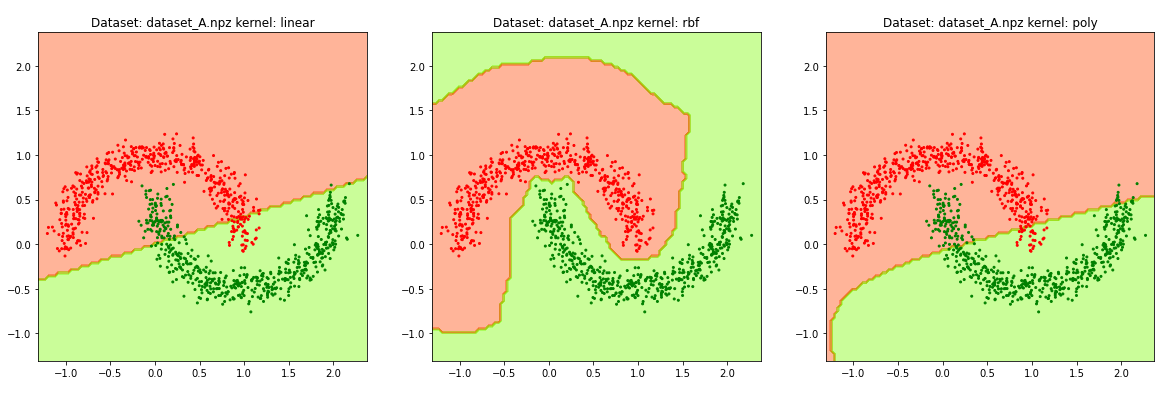

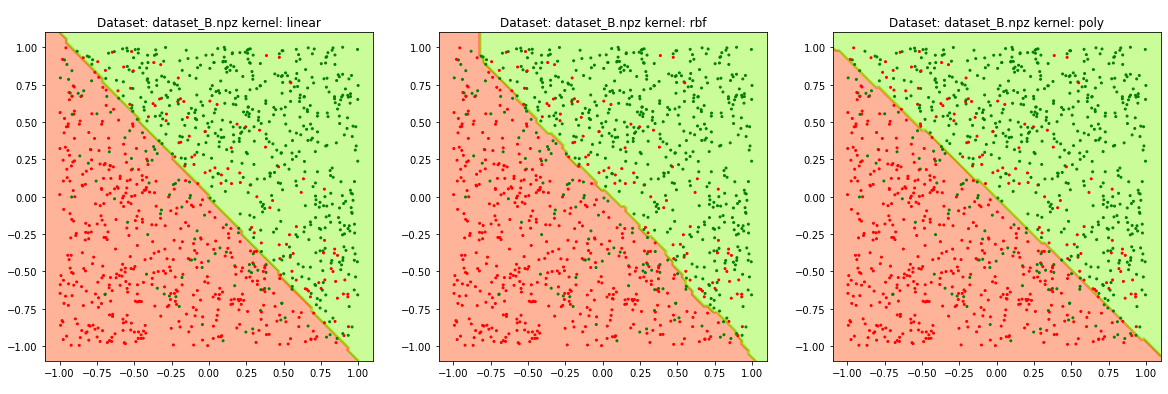

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

k =0
ker = [1000,1000,2,1000,100,2]
for i in ["dataset_A.npz","dataset_B.npz"]:
  d = np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = d["arr_1"]
  X_train = X[:int(0.75*len(X))]
  Y_train = Y[:int(0.75*len(Y))]
  fig = plt.figure(figsize=(20,7))
  plt.axis('off')
  a = 1
  for j in range(3):
    X,Y = np.meshgrid(np.linspace(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,100), np.linspace(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,100))
    z = (np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1))
    Y_pred = test_pred(best_alphas[k][2], X_train, Y_train, z, kernel=best_alphas[k][1], kernel_param=ker[k])
    Y_pred = Y_pred.reshape(X.shape)
    ax1 = fig.add_subplot(1,3,a)
    ax1.set(adjustable='box', aspect='equal')
    ax1.title.set_text("Dataset: "+i+" kernel: "+best_alphas[j][1]) 
    ax1.contourf(X,Y,Y_pred, colors = ['orangered','lawngreen'], alpha = 0.4, extend = 'both')
    cmap_ = ['red' if i==-1 else 'green' for i in Y_train]
    k = k+1
    a = a+1

    ax1.scatter(X_train[:,0],X_train[:,1],s = 4,color = cmap_)
  plt.show()

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [2]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here


def SVM(C, kernel, gamma = 1,degree = 0,coef0 = 1):
  
  if kernel == 'linear':
    model = svm.SVC(kernel = 'linear', C = C)
    return model
  elif kernel == 'poly':
    model = svm.SVC(C=C, kernel = 'poly', degree = degree, coef0 = 1)
    return model
  else:
    model = svm.SVC(C= C, kernel = 'rbf', gamma = gamma)
    return model

In [5]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.


best_hyperparameter_set = [{
        'linear' :([]),
        'poly'   :([]),
        'rbf'    :([])},{
        'linear' :([]),
        'poly'   :([]),
        'rbf'    :([])},{
        'linear' :([]),
        'poly'   :([]),
        'rbf'    :([])},{
        'linear' :([]),
        'poly'   :([]),
        'rbf'    :([])}]
set =0
for i in ['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']:
  d11 = np.load("../../Data/"+i)
  X = d11["arr_0"]
  Y = d11["arr_1"]
  X_train = X[:int(0.75*len(X))]
  Y_train = Y[:int(0.75*len(Y))]
  X_val = X[int(0.75*len(X)):]
  Y_val = Y[int(0.75*len(Y)):]
  X_test = d11["arr_2"]
  Y_test = d11["arr_3"]
  #minscore = 0
  for kernel in ['linear','poly','rbf']:
    if kernel == 'linear':
      min_score = 0
      best_c = 0
      for C in [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3]:
        model = SVM(C=C, kernel='linear')
        model.fit(X_train,Y_train)
        y_predict = model.predict(X_val)
        y_predict_train = model.predict(X_train)
        score_train = list(y_predict_train == Y_train).count(True)/(len(list(y_predict_train == Y_train)))
        score = list(y_predict == Y_val).count(True)/(len(list(y_predict == Y_val)))
        if score > min_score:
          min_score = score
          best_c = C
          best_train = score_train
          best_model = model
      best_hyperparameter_set[set][kernel].append(best_c)
      Y_test_acc= best_model.predict(X_test)
      acc_test = list(Y_test == Y_test_acc).count(True)/(len(list(Y_test == Y_test_acc)))
      print("Best hyperparameter(C) for linear kernel is ",best_c, " test score is ",acc_test," train score is ",best_train, " Data set "+i)
    if kernel == 'poly':
      min_score = 0
      best_c = 0
      best_degree = 0
      for degree in [1,2,4,8]:
        for C in [1e-3,1e-2,1e-1,1,1e1,1e2]:
          model = SVM(C=C, kernel='poly', degree = degree,coef0 = 1)
          model.fit(X_train,Y_train)
          y_predict = model.predict(X_val)
          score = list(y_predict == Y_val).count(True)/(len(list(y_predict == Y_val)))
          y_predict_train = model.predict(X_train)
          score_train = list(y_predict_train == Y_train).count(True)/(len(list(y_predict_train == Y_train)))
          if score > min_score:
            min_score = score
            best_c = C
            best_degree = degree
            best_train = score_train
            best_model = model
      best_hyperparameter_set[set][kernel].append([best_c,best_degree])
      Y_test_acc= best_model.predict(X_test)
      acc_test = list(Y_test == Y_test_acc).count(True)/(len(list(Y_test == Y_test_acc)))
      print("Best hyperparameters(C,degree) for poly kernel are ",best_c,best_degree, " test score is ",acc_test," train score is ",best_train, " Data set "+i)    
    if kernel == 'rbf':
      min_score = 0
      best_gamma = 0
      best_c = 0
      for gamma in [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3]:
        for c in [1e-3,1e-2,1e-1,1,1e1,1e2]:
          model = SVM(C=c,kernel='rbf',gamma=gamma)
          model.fit(X_train,Y_train)
          y_predict = model.predict(X_val)
          y_predict_train = model.predict(X_train)
          score_train = list(y_predict_train == Y_train).count(True)/(len(list(y_predict_train == Y_train)))
          score = list(y_predict == Y_val).count(True)/(len(list(y_predict == Y_val)))
          if score > min_score:
            min_score = score
            best_gamma = gamma
            best_c = c
            best_train = score_train
            best_model = model
      best_hyperparameter_set[set][kernel].append([best_gamma,best_c])
      Y_test_acc= best_model.predict(X_test)
      acc_test = list(Y_test == Y_test_acc).count(True)/(len(list(Y_test == Y_test_acc)))
      print("Best hyperparameter(gamma) for rbf kernel is ",best_gamma,"best c ",best_c ," test score is ",acc_test," train score is ",best_train, " Data set "+i)
  set = set+1



Best hyperparameter(C) for linear kernel is  10.0  test score is  0.868  train score is  0.8702222222222222  Data set dataset_A.npz
Best hyperparameters(C,degree) for poly kernel are  0.1 4  test score is  1.0  train score is  0.9982222222222222  Data set dataset_A.npz
Best hyperparameter(gamma) for rbf kernel is  0.1 best c  100.0  test score is  0.996  train score is  0.9964444444444445  Data set dataset_A.npz
Best hyperparameter(C) for linear kernel is  1  test score is  0.8  train score is  0.8266666666666667  Data set dataset_B.npz
Best hyperparameters(C,degree) for poly kernel are  1 1  test score is  0.8  train score is  0.8266666666666667  Data set dataset_B.npz
Best hyperparameter(gamma) for rbf kernel is  0.001 best c  100.0  test score is  0.804  train score is  0.824  Data set dataset_B.npz
Best hyperparameter(C) for linear kernel is  0.0001  test score is  0.8787878787878788  train score is  0.9208888888888889  Data set dataset_C.npz
Best hyperparameters(C,degree) for poly

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

Kernel = Linear:
--------
|Data set| Train zero one error| Test error |hyperparameter = 'linear'
|:-------|:-------------------:|:----------:|:-------------:|
dataset_A.npz|0.1298|0.132|10|
dataset_.Bnpz|0.1733|0.2|1|
dataset_C.npz|0.0792|0.1213|0.0001|
dataset_D.npz|0.04|0.0592|1|

Kernel = poly
--------
|Data set| Train zero one error| Test error |Kernel hyperparameters= 'poly'
|:-------|:-------------------:|:----------:|:-------------:|
dataset_A.npz|0.00178|0.00|(C,degree) = (0.1,4)|
dataset_.Bnpz|0.1733|0.2|(C,degree) = (1,1)|
dataset_C.npz|0.00089|0.0168351|(C,degree) = (0.001,8)|
dataset_D.npz|0.1433|0.0651|(C,degree) = (0.01,4)|


Kernel = rbf

--------
|Data set| Train zero one error| Test error |Kernel hyperparameters= 'rbf'
|:-------|:-------------------:|:----------:|:-------------:|
dataset_A.npz|0.00356|0.004|(gamma,C) = (0.1,100)|
dataset_.Bnpz|0.176|0.196|(gamma,C) = (0.001,100)|
dataset_C.npz|0.00|0.02357|(gamma,C) = (0.001,1)|
dataset_D.npz|0.03|0.077|(gamma,C) = (0.0001,10)|


Observations: The rbf and poly kernals have classified data with high accuracy.As the Dataset A is not linearly separable, linear classifier is unable to find a linearly separable boundary. All three kernels performed relatively bad on the dataset B as the data distribution is from a uniform distribution which is evident from the plot of the data set B.


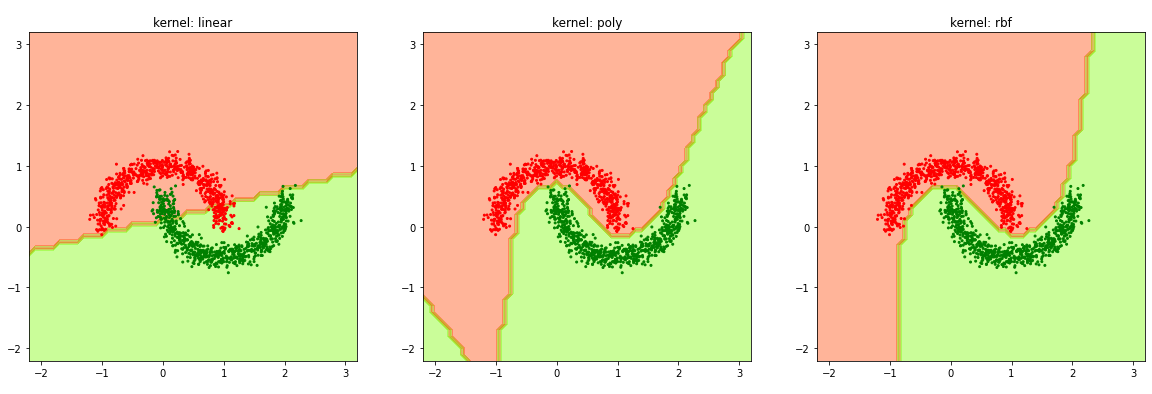

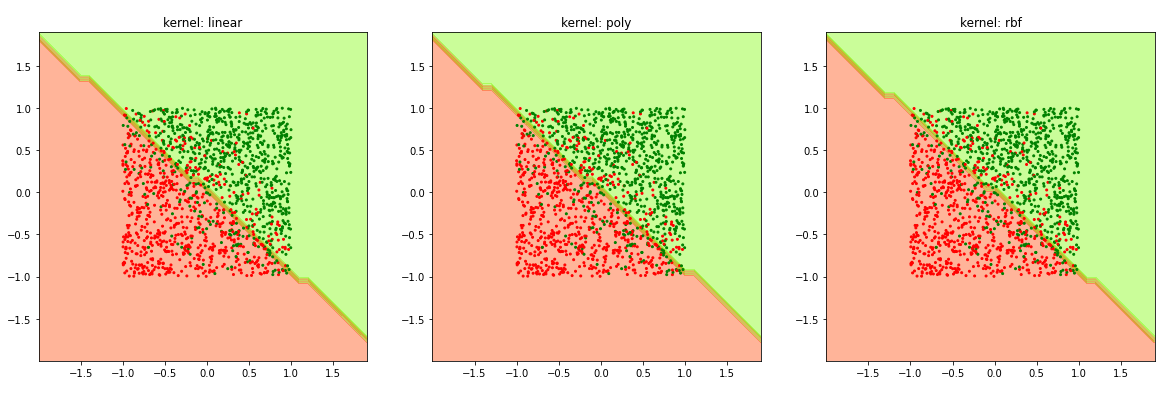

In [9]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

for i in range(2):
  a = 1
  if i==0:
    d = np.load("../../Data/dataset_A.npz")
    X_train = d["arr_0"]
    Y_train = d["arr_1"]
  else:
    d = np.load("../../Data/dataset_B.npz")
    X_train = d["arr_0"]
    Y_train = d["arr_1"]


  X,Y = np.meshgrid(np.arange(min(X_train[:,0])-1,max(X_train[:,0])+1,0.1), np.arange(min(X_train[:,0])-1,max(X_train[:,0])+1,0.1))
  z = (np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1))
  dict_ =   best_hyperparameter_set[i]
  fig = plt.figure(figsize=(20,7))
  plt.axis('off')
  a = 1
  for kernel in dict_:
    if kernel == 'linear':
      C = dict_['linear'][0]
      model = SVM(C=C, kernel='linear')
      model.fit(X_train,Y_train)
      y_predict = model.predict(z)
      y_predict = y_predict.reshape(X.shape)
      ax1 = fig.add_subplot(1,3,a)
      ax1.set(adjustable='box', aspect='equal')
      ax1.title.set_text("kernel: linear")
      
      ax1.contourf(X,Y,y_predict, colors = ['orangered','lawngreen'],extend ='both',alpha = 0.4)
      cmap_= ['red' if i == -1 else 'green' for i in Y_train]
      ax1.scatter(X_train[:,0],X_train[:,1],s=4,color = cmap_)
      a =a+1

    if kernel == 'poly':
      C = dict_['poly'][0][0]
      degree = dict_['poly'][0][1]
      model = SVM(C=C, kernel='poly', degree = degree,coef0 = 1)
      model.fit(X_train,Y_train)
      y_predict = model.predict(z)
      y_predict = y_predict.reshape(X.shape)
      ax1 = fig.add_subplot(1,3,a)
      ax1.set(adjustable='box', aspect='equal')
      ax1.title.set_text("kernel: poly")
      
      ax1.contourf(X,Y,y_predict, colors = ['orangered','lawngreen'],extend ='both',alpha = 0.4)
      cmap_= ['red' if i == -1 else 'green' for i in Y_train]
      ax1.scatter(X_train[:,0],X_train[:,1],s=4,color = cmap_)
      
      a =a+1
    if kernel == 'rbf':
      gamma = dict_['rbf'][0][0]
      c = dict_['rbf'][0][1]
      model = SVM(C=c,kernel='rbf',gamma=gamma)
      model.fit(X_train,Y_train)

      y_predict = model.predict(z)
      y_predict = y_predict.reshape(X.shape)
      ax1 = fig.add_subplot(1,3,a)
      ax1.set(adjustable='box', aspect='equal')
      ax1.title.set_text("kernel: rbf")
      
      ax1.contourf(X,Y,y_predict, colors = ['orangered','lawngreen'],extend ='both',alpha = 0.4)
      cmap_= ['red' if i == -1 else 'green' for i in Y_train]
      ax1.scatter(X_train[:,0],X_train[:,1],s=4,color = cmap_)
      a =a+1
  plt.show()




# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)



class node:
  def __init__(self,feature=None,threshold=None,left = None,right = None,*,puresplit = None):
    self.left = left
    self.right = right
    self.feature = feature
    self.thresh = threshold
    self.puresplitvalue = puresplit
  
  def isleaf(self):
    if self.puresplitvalue == None:
      return False
    else:
      return True






class DecisionTree:
  
  def __init__(self, maxdepth=100, min_node_size = 1, criteria = 'accuracy'):
    self.maxdepth = maxdepth
    self.min_node_size = min_node_size
    self.criteria = criteria
    self.root =  None


  def entropy(self,X,Y):
    best_feature = 0
    best_thresh = 0
    n_features = X.shape[1]
    best_entropy  = 1
    for i in range(n_features):
      possible_thresh = np.linspace(min(X[i]),max(X[i]),10)[1:-1]
      if len(np.unique(possible_thresh)) ==1:
        continue
      for thresh in possible_thresh:
        Y_left = Y[X[i] <= thresh]
        Y_right = Y[X[i] > thresh]
        X_left = X[X[i] <= thresh]
        X_right = X[X[i] > thresh]
    
        if len(Y_left) != 0: 
          e_l_t = Y_left[0].value_counts()
      
          classes = Y_left[0].unique()
          e_l = 0
          for k in classes:
            p_x = e_l_t[k]/len(Y_left[0])
            e_l = e_l+ (p_x*np.log(p_x)/np.log(2))
          e_l = -1*e_l
        else:
          e_l = 0
        if len(Y_right) != 0:
          e_r_t = Y_right[0].value_counts()
    
          classes = Y_right[0].unique()
          e_r = 0
          for v in classes:
            p_x = e_r_t[v]/len(Y_right[0])
            e_r = e_r+ (p_x*np.log(p_x)/np.log(2))
          e_r = -1*e_r
        else:
          e_r = 0
        entropy = (X_left.shape[0]*e_l/X.shape[0]) + (X_right.shape[0]*e_r/X.shape[0])
        if entropy < best_entropy:
          best_entropy = entropy
          best_feature = i
          best_thresh = thresh
 
    return best_feature, best_thresh


  def accuracy(self,X,Y):
    best_feature = None
    best_thresh = None
    n_features = X.shape[1]
    best_acc = -1
    for i in range(n_features):
      possible_thresh = np.linspace(min(X[i]),max(X[i]),10)[1:-1]
      if len(np.unique(possible_thresh)) ==1:
        continue
      for thresh in possible_thresh:
        Y_left = Y[X[i] <= thresh]
        Y_right = Y[X[i] > thresh]
        X_left = X[X[i] <= thresh]
        X_right = X[X[i] > thresh]



        # accuracy if left is assigned -1 

        
        Y_pred_left = -np.ones(Y_left.shape[0])
        Y_actual_left = np.array(Y_left).flatten()
        count1 = list(Y_pred_left == Y_actual_left).count(True)  
        Y_pred_right = np.ones(Y_right.shape[0])
        Y_actual_right = np.array(Y_right).flatten()
        count2 = list(Y_pred_right == Y_actual_right).count(True)  
        acc1 = (count1+count2)/(Y_left.shape[0]+Y_right.shape[0])
        

        # accuracy if left is assigned 1

        Y_pred_left = np.ones(Y_left.shape[0])
        Y_actual_left = np.array(Y_left).flatten()
        count_1 = list(Y_pred_left == Y_actual_left).count(True)  
        Y_pred_right = -np.ones(Y_right.shape[0])
        Y_actual_right = np.array(Y_right).flatten()
        count_2 = list(Y_pred_right == Y_actual_right).count(True)  
        acc2 = (count_1+count_2)/(Y_left.shape[0]+Y_right.shape[0])
        

        if acc1 >= acc2:
          if acc1 >= best_acc:
            best_acc = acc1
            best_feature = i
            best_thresh = thresh
        else:
          if acc2 >= best_acc:
            best_acc = acc2
            best_feature = i
            best_thresh = thresh
    
    return best_feature, best_thresh




  def buildtree(self,X,Y,depth):
    nsamples = X.shape[0]
    labels = len(Y[0].unique())


    if (nsamples <= self.min_node_size) or (depth >= self.maxdepth):
      puresplitvalue = Y.mode()[0][0]
      return node(puresplit=puresplitvalue)
    
    if labels == 1:
      puresplitvalue = Y.mode()[0][0]
      return node(puresplit=puresplitvalue)

    if self.criteria == 'accuracy':
      best_feature,best_thresh   = self.accuracy(X,Y)
    
    if self.criteria == 'entropy':
      best_feature,best_thresh   = self.entropy(X,Y)
    
    X_left = X[X[best_feature]<=best_thresh]
    X_right = X[X[best_feature]>best_thresh]
    Y_left = Y[X[best_feature]<=best_thresh]
    Y_right = Y[X[best_feature]>best_thresh]

    
    left = self.buildtree(X_left,Y_left,depth+1)
        
    right = self.buildtree(X_right,Y_right,depth+1)
    
    return node(feature=best_feature,threshold=best_thresh,left=left,right=right) 
  
  def traversetree(self,node,xt):

    
    if node.isleaf() == True:
      return node.puresplitvalue
    

    if xt[node.feature] <= node.thresh :
      return self.traversetree(node.left,xt)
    else:
      return self.traversetree(node.right,xt)
    
    
  
  
  
  
  def predict(self,X_test):
    # X_test is a numpy array
    X_test = np.array(X_test)
    y_pred = np.array([])
    for xt in X_test:
      pred = self.traversetree(self.root,xt)
      y_pred = np.append(y_pred,pred)

    return y_pred
    

  
  def fit(self,X,Y):

    X = pd.DataFrame(X)
    Y = pd.DataFrame(Y)

    self.root = self.buildtree(X,Y,0)



def calc_accuracy(Y_test,Y_predict):
  return list(Y_test==Y_predict).count(True)/(len(Y_test == Y_predict))
    

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
  """ Returns a decision tree trained on X and Y. 
  Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
  Split criterion can be either 'accuracy' or 'entropy'.
  Returns a tree (In whatever format that you find appropriate)
  """


  classifier = DecisionTree(min_node_size=num_nodes_stop,criteria = criterion)
  classifier.fit(X,Y)

  return classifier

    

def eval_decision_tree(tree, test_X):
  """ Takes in a tree, and a bunch of instances X and 
  returns the tree predicted values at those instances."""
  y_pred = tree.predict(test_X)
  return y_pred






In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.


#hyper parameter tuning for entropy
for i in ["dataset_A.npz","dataset_B.npz","dataset_C.npz","dataset_D.npz"]:
  d = np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = (d["arr_1"])
 
  X_train = X[:int(0.8*X.shape[0])]
  Y_train = Y[:int(0.8*X.shape[0])]
  X_val = X[int(0.8*X.shape[0]):]
  Y_val = Y[int(0.8*X.shape[0]):]

  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_acc = -1
  best_minsample_size = 0
  train_score = -1
  best_model = None
  for numnodes in [1,10,100,1000]:
    model = DecisionTree(min_node_size =numnodes,criteria= 'entropy')
    model.fit(X_train,Y_train)
    y_predict_train = model.predict(X_train)
    y_predict  = model.predict(X_val)
    acc_train = calc_accuracy(Y_train,y_predict_train)
    acc = calc_accuracy(Y_val,y_predict)
    if acc>=best_acc:
      best_minsample_size = numnodes
      best_acc = acc
      train_score = acc_train
      best_model = model
  y_predict_test  = best_model.predict(X_test)
  acc_test = calc_accuracy(Y_test,y_predict_test)
  print("Criteria: entropy, Dataset:"+i+" best minimum size of sample: ",best_minsample_size, " test and train error: ",[acc_test,train_score])




#accuracy
for i in ["dataset_A.npz","dataset_B.npz","dataset_C.npz","dataset_D.npz"]:
  d = np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = (d["arr_1"])
 
  X_train = X[:int(0.8*X.shape[0])]
  Y_train = Y[:int(0.8*X.shape[0])]
  X_val = X[int(0.8*X.shape[0]):]
  Y_val = Y[int(0.8*X.shape[0]):]

  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_acc = -1
  best_minsample_size = 0
  train_score = -1
  best_model = None
  for numnodes in [1,10,100,1000]:
    model = DecisionTree(min_node_size =numnodes,criteria= 'accuracy')
    model.fit(X_train,Y_train)
    y_predict_train = model.predict(X_train)
    y_predict  = model.predict(X_val)
    acc_train = calc_accuracy(Y_train,y_predict_train)
    acc = calc_accuracy(Y_val,y_predict)
    if acc>=best_acc:
      best_minsample_size = numnodes
      best_acc = acc
      train_score = acc_train
      best_model = model
  y_predict_test  = best_model.predict(X_test)
  acc_test = calc_accuracy(Y_test,y_predict_test)
  print("Criteria: accuracy, Dataset:"+i+" best minimum size of sample: ",best_minsample_size, " test and train error: ",[acc_test,train_score])





Criteria: entropy, Dataset:dataset_A.npz best minimum size of sample:  100  test and train error:  [0.994, 0.9983333333333333]
Criteria: entropy, Dataset:dataset_B.npz best minimum size of sample:  10  test and train error:  [0.752, 0.885]
Criteria: entropy, Dataset:dataset_C.npz best minimum size of sample:  1  test and train error:  [0.9124579124579124, 1.0]
Criteria: entropy, Dataset:dataset_D.npz best minimum size of sample:  1  test and train error:  [0.9230769230769231, 1.0]
Criteria: accuracy, Dataset:dataset_A.npz best minimum size of sample:  10  test and train error:  [0.954, 0.9708333333333333]
Criteria: accuracy, Dataset:dataset_B.npz best minimum size of sample:  10  test and train error:  [0.77, 0.8608333333333333]
Criteria: accuracy, Dataset:dataset_C.npz best minimum size of sample:  10  test and train error:  [0.8484848484848485, 0.9425]
Criteria: accuracy, Dataset:dataset_D.npz best minimum size of sample:  1  test and train error:  [0.8994082840236687, 1.0]


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

Observations: As the minimum node size for sample split decreases, the tree is very likely to overfit the training data. Thus, exhibits high variance. If the minimum size of node to split increases, the bias of the tree increases, thus it might not generalize the data very well. The optimal size of node to split is found using a validation set and the training and test error have been reported below. The best hyperparmeter which is the minimum size of node to split, is dependent on the data set i.e the data distribution of the sample. The best node split size has also been reported below. 

Hyper parameter is the minimum size of node to stop splitting

Train and Test zero one error, criteria : Entropy:

--------
|Data set| Train zero one error| Test error |Hyper parameter|
|:-------|:-------------------:|:----------:|:-------------:|
|dataset_A.npz| 0.001667| 0.006|100|
|dataset_B.npz|0.115|0.248|10|
|dataset_C.npz|0.0|0.0875|1|
|dataset_D.npz|0.0|0.07693|1|

Train and Test zero one error, criteria : Accuracy:

--------
|Data set| Train zero one error| Test error |Hyper parameter|
|:-------|:-------------------:|:----------:|:-------------:|
|dataset_A.npz| 0.029167| 0.046|10|
|dataset_B.npz|0.13916|0.23|10|
|dataset_C.npz|0.0575|0.1516|10|
|dataset_D.npz|0.00|0.10|1|



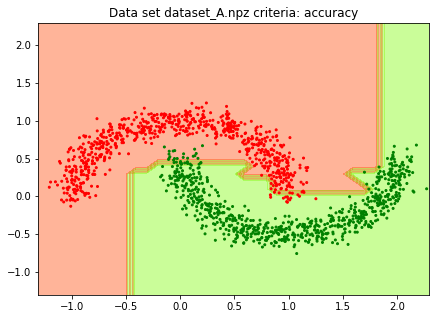

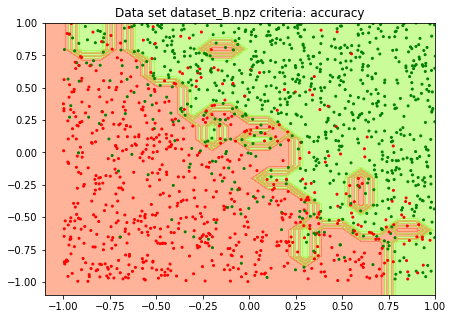

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
for i in ['dataset_A.npz','dataset_B.npz']:
  d = np.load("../../Data/"+i)
  X_train = pd.DataFrame(d['arr_0'])
  Y_train = pd.DataFrame(d["arr_1"])
  if i == 'dataset_A.npz':
    best_tree = train_decision_tree(X_train,Y_train,num_nodes_stop=10,criterion = 'accuracy')
  if i=='dataset_B.npz':
    best_tree = train_decision_tree(X_train,Y_train,num_nodes_stop=10,criterion = 'accuracy')
  
  X_train = np.array(X_train)
  Y_train = np.array(Y_train).flatten()

  X,Y = np.meshgrid(np.arange(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,0.1), np.arange(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,0.1))
  z = (np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1))
  y_pred_graph = eval_decision_tree(best_tree,z)
  y_pred_graph = y_pred_graph.reshape(X.shape)
  plt.figure(figsize = (7,5))
  plt.contourf(X,Y,y_pred_graph, colors = ['orangered','lawngreen'], alpha = 0.4, extend = 'both')
  cmap_ = ['red' if i==-1 else 'green' for i in Y_train]
  plt.scatter(X_train[:,0],X_train[:,1],s = 4,color = cmap_)
  plt.title("Data set "+i+' criteria: accuracy')
  plt.show()



# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier.

class node:
  def __init__(self,feature=None,threshold=None,left = None,right = None,*,puresplit = None):
    self.left = left
    self.right = right
    self.feature = feature
    self.thresh = threshold
    self.puresplitvalue = puresplit
  
  def isleaf(self):
    if self.puresplitvalue == None:
      return False
    else:
      return True






class RandomForestDecisionTree:
  
  def __init__(self, maxdepth=100, min_node_size = 1, criteria = 'accuracy'):
    self.maxdepth = maxdepth
    self.min_node_size = min_node_size
    self.criteria = criteria
    self.root =  None


  def entropy(self,X,Y):
    best_feature = 0
    best_thresh = 0
    n_features = np.random.choice(X.shape[1],int(0.5*X.shape[1]),replace = False)
    best_entropy  = 1
    for i in (n_features):
      possible_thresh = (np.linspace(min(X[i]),max(X[i]),10))[1:-1]
      if len(np.unique(possible_thresh)) ==1:
        continue
      for thresh in possible_thresh:
        Y_left = Y[X[i] <= thresh]
        Y_right = Y[X[i] > thresh]
        X_left = X[X[i] <= thresh]
        X_right = X[X[i] > thresh]
    
        if len(Y_left) != 0: 
          e_l_t = Y_left[0].value_counts()
      
          classes = Y_left[0].unique()
          e_l = 0
          for k in classes:
            p_x = e_l_t[k]/len(Y_left[0])
            e_l = e_l+ (p_x*np.log(p_x)/np.log(2))
          e_l = -1*e_l
        else:
          e_l = 0
        if len(Y_right) != 0:
          e_r_t = Y_right[0].value_counts()
    
          classes = Y_right[0].unique()
          e_r = 0
          for v in classes:
            p_x = e_r_t[v]/len(Y_right[0])
            e_r = e_r+ (p_x*np.log(p_x)/np.log(2))
          e_r = -1*e_r
        else:
          e_r = 0
        entropy = (X_left.shape[0]*e_l/X.shape[0]) + (X_right.shape[0]*e_r/X.shape[0])
        if entropy <= best_entropy:
          best_entropy = entropy
          best_feature = i
          best_thresh = thresh
 
    return best_feature, best_thresh


  def accuracy(self,X,Y):
    best_feature = None
    best_thresh = None
    n_features  = np.random.choice(X.shape[1],int(0.5*X.shape[1]),replace = False)
    best_acc = -1
    for i in (n_features):
      possible_thresh = np.linspace(min(X[i]),max(X[i]),10)[1:-1]
      if len(np.unique(possible_thresh)) ==1:
        continue
      for thresh in possible_thresh:
        Y_left = Y[X[i] <= thresh]
        Y_right = Y[X[i] > thresh]
        X_left = X[X[i] <= thresh]
        X_right = X[X[i] > thresh]



        # accuracy if left is assigned -1 

        
        Y_pred_left = -np.ones(Y_left.shape[0])
        Y_actual_left = np.array(Y_left).flatten()
        count1 = list(Y_pred_left == Y_actual_left).count(True)  
        Y_pred_right = np.ones(Y_right.shape[0])
        Y_actual_right = np.array(Y_right).flatten()
        count2 = list(Y_pred_right == Y_actual_right).count(True)  
        acc1 = (count1+count2)/(Y_left.shape[0]+Y_right.shape[0])
        

        # accuracy if left is assigned 1

        Y_pred_left = np.ones(Y_left.shape[0])
        Y_actual_left = np.array(Y_left).flatten()
        count_1 = list(Y_pred_left == Y_actual_left).count(True)  
        Y_pred_right = -np.ones(Y_right.shape[0])
        Y_actual_right = np.array(Y_right).flatten()
        count_2 = list(Y_pred_right == Y_actual_right).count(True)  
        acc2 = (count_1+count_2)/(Y_left.shape[0]+Y_right.shape[0])
        

        if acc1 >= acc2:
          if acc1 >= best_acc:
            best_acc = acc1
            best_feature = i
            best_thresh = thresh
        else:
          if acc2 >= best_acc:
            best_acc = acc2
            best_feature = i
            best_thresh = thresh
    
    return best_feature, best_thresh




  def buildtree(self,X,Y,depth):
    nsamples = X.shape[0]
    labels = len(Y[0].unique())


    if (nsamples <= self.min_node_size) or (depth >= self.maxdepth):
      
      puresplitvalue = Y.mode()[0][0]
      return node(puresplit=puresplitvalue)
    
    if labels == 1:
      puresplitvalue = Y.mode()[0][0]
      return node(puresplit=puresplitvalue)

    if self.criteria == 'accuracy':
      best_feature,best_thresh   = self.accuracy(X,Y)
    
    if self.criteria == 'entropy':
      best_feature,best_thresh   = self.entropy(X,Y)
      
    
    X_left = X[X[best_feature]<=best_thresh]
    X_right = X[X[best_feature]>best_thresh]
    Y_left = Y[X[best_feature]<=best_thresh]
    Y_right = Y[X[best_feature]>best_thresh]

    
    left = self.buildtree(X_left,Y_left,depth+1)
        
    right = self.buildtree(X_right,Y_right,depth+1)
    
    return node(feature=best_feature,threshold=best_thresh,left=left,right=right) 
  
  def traversetree(self,node,xt):

    
    if node.isleaf() == True:
      return node.puresplitvalue
    

    if xt[node.feature] <= node.thresh :
      return self.traversetree(node.left,xt)
    else:
      return self.traversetree(node.right,xt)
    
    
  
  
  
  
  def predict(self,X_test):
    # X_test is a numpy array
    X_test = np.array(X_test)
    y_pred = np.array([])
    for xt in X_test:
      pred = self.traversetree(self.root,xt)
      y_pred = np.append(y_pred,pred)

    return y_pred
    

  
  def fit(self,X,Y):

    X = pd.DataFrame(X)
    Y = pd.DataFrame(Y)

    self.root = self.buildtree(X,Y,0)



def calc_accuracy(Y_test,Y_predict):
  return list(Y_test==Y_predict).count(True)/(len(Y_test == Y_predict))



class RandomForest:
  def __init__(self,num_trees=10, num_nodes_stop=1,criterion='accuracy', a=0.5, b=0.5):
    self.num_trees = num_trees
    self.num_nodes_stop  =num_nodes_stop
    self.criteria = criterion
    self.frac = a
    self.fracfeatures = b
    self.root = []
  
  def fit(self,X,Y):
    samp = np.random.choice(X.shape[0],int((self.frac)*X.shape[0]),replace= False)
    feat = np.random.choice(X.shape[1],int((self.fracfeatures)*X.shape[1]), replace = False)
    X_train = pd.DataFrame(X[samp])
    Y_train = pd.DataFrame(Y[samp])
    for i in range(self.num_trees):
      
      classifier = RandomForestDecisionTree(min_node_size =self.num_nodes_stop,criteria =self.criteria)
      classifier.fit(X_train,Y_train)
      self.root.append(classifier)


    
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
  """ Returns a random forest trained on X and Y. 
  Trains num_trees.
  Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
  Split criterion can be either 'accuracy' or 'entropy'.
  Fraction of data used per tree = a
  Fraction of features used in each node = b
  Returns a random forest (In whatever format that you find appropriate)
  """
  classifier = RandomForest(num_trees, num_nodes_stop,criterion, a=0.5, b=0.5)
  classifier.fit(X,Y)
  return classifier.root
    

def eval_random_forest(random_forest, test_X):
  """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and 
  returns the tree predicted values at those instances."""
  predictions = []
  for tree in random_forest:
    predictions.append(tree.predict(test_X))

  predictions = np.array(predictions)
  predictions = predictions.sum(axis = 0)
  predictions = np.sign(predictions)
  return predictions

In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.


#Criteria entropy
best_forests_entropy = {}
for i in ["dataset_A.npz","dataset_B.npz","dataset_D.npz"]:
  
  d= np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = d["arr_1"]
  X_train = X[:int(0.8*X.shape[0])]
  Y_train = Y[:int(0.8*X.shape[0])]
  X_val = X[int(0.8*X.shape[0]):]
  Y_val = Y[int(0.8*X.shape[0]):]

  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_test_acc = -1
  best_train_acc = -1
  best_forest = []
  for numtress in [11,51,101]:
    forest = train_random_forest(X_train, Y_train, num_trees=numtress, num_nodes_stop=1, criterion='entropy', a=0.5, b=0.5)
    y_pred_train = eval_random_forest(forest,X_train)
  
    y_pred_val = eval_random_forest(forest,X_val)
  
    acc_train = list(y_pred_train==Y_train).count(True)/len(list(y_pred_train==Y_train))
    acc_test = list(y_pred_val==Y_val).count(True)/len(list(y_pred_val==Y_val))
    


    if acc_test>=best_test_acc:
      best_test_acc = acc_test
      best_train_acc = acc_train
      best_forest = forest[:]

  
  y_pred_test = eval_random_forest(best_forest,X_test)
  acc_test_data = list(y_pred_test==Y_test).count(True)/len(list(y_pred_test==Y_test))
  best_forests_entropy[i] = best_forest
  print("Criteria: Entropy, Dataset:"+i+"best test acc: ",acc_test_data,"best train acc: ",best_train_acc,"Best number of forests: ",len(best_forest))

#criteria accuracy
best_forests_accuracy = {}
for i in ["dataset_A.npz","dataset_B.npz","dataset_D.npz"]:
  d= np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = d["arr_1"]
  X_train = X[:int(0.8*X.shape[0])]
  Y_train = Y[:int(0.8*X.shape[0])]
  X_val = X[int(0.8*X.shape[0]):]
  Y_val = Y[int(0.8*X.shape[0]):]

  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_test_acc = -1
  best_train_acc = -1
  best_forest = []
  for numtress in [11,51,101]:
    forest = train_random_forest(X_train, Y_train, num_trees=numtress, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5)
    y_pred_train = eval_random_forest(forest,X_train)
  
    y_pred_val = eval_random_forest(forest,X_val)
  
    acc_train = list(y_pred_train==Y_train).count(True)/len(list(y_pred_train==Y_train))
    acc_test = list(y_pred_val==Y_val).count(True)/len(list(y_pred_val==Y_val))
    


    if acc_test>=best_test_acc:
      best_test_acc = acc_test
      best_train_acc = acc_train
      best_forest = forest[:]

  
  y_pred_test = eval_random_forest(best_forest,X_test)
  acc_test_data = list(y_pred_test==Y_test).count(True)/len(list(y_pred_test==Y_test))
  best_forests_accuracy[i] = best_forest
  print("Criteria: Accuracy, Dataset:"+i+"best test acc: ",acc_test_data,"best train acc: ",best_train_acc,"Best number of forests: ",len(best_forest))  


for i in ["dataset_C.npz"]:
  
  d= np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = d["arr_1"]
  X_train = X[:int(0.8*X.shape[0])]
  Y_train = Y[:int(0.8*X.shape[0])]
  X_val = X[int(0.8*X.shape[0]):]
  Y_val = Y[int(0.8*X.shape[0]):]

  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_test_acc = -1
  best_train_acc = -1
  best_forest = []
  for numtress in [11,51,101]:
    forest = train_random_forest(X_train, Y_train, num_trees=numtress, num_nodes_stop=1, criterion='entropy', a=0.5, b=0.5)
    y_pred_train = eval_random_forest(forest,X_train)
  
    y_pred_val = eval_random_forest(forest,X_val)
  
    acc_train = list(y_pred_train==Y_train).count(True)/len(list(y_pred_train==Y_train))
    acc_test = list(y_pred_val==Y_val).count(True)/len(list(y_pred_val==Y_val))
    


    if acc_test>=best_test_acc:
      best_test_acc = acc_test
      best_train_acc = acc_train
      best_forest = forest[:]

  
  y_pred_test = eval_random_forest(best_forest,X_test)
  acc_test_data = list(y_pred_test==Y_test).count(True)/len(list(y_pred_test==Y_test))
  best_forests_entropy[i] = best_forest
  print("Criteria: Entropy, Dataset:"+i+"best test acc: ",acc_test_data,"best train acc: ",best_train_acc,"Best number of forests: ",len(best_forest))



for i in ["dataset_C.npz"]:
  
  d= np.load("../../Data/"+i)
  X = d["arr_0"]
  Y = d["arr_1"]
  X_train = X[:int(0.8*X.shape[0])]
  Y_train = Y[:int(0.8*X.shape[0])]
  X_val = X[int(0.8*X.shape[0]):]
  Y_val = Y[int(0.8*X.shape[0]):]

  X_test = d["arr_2"]
  Y_test = d["arr_3"]
  best_test_acc = -1
  best_train_acc = -1
  best_forest = []
  for numtress in [11,51,101]:
    forest = train_random_forest(X_train, Y_train, num_trees=numtress, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5)
    y_pred_train = eval_random_forest(forest,X_train)
  
    y_pred_val = eval_random_forest(forest,X_val)
  
    acc_train = list(y_pred_train==Y_train).count(True)/len(list(y_pred_train==Y_train))
    acc_test = list(y_pred_val==Y_val).count(True)/len(list(y_pred_val==Y_val))
    


    if acc_test>=best_test_acc:
      best_test_acc = acc_test
      best_train_acc = acc_train
      best_forest = forest[:]

  
  y_pred_test = eval_random_forest(best_forest,X_test)
  acc_test_data = list(y_pred_test==Y_test).count(True)/len(list(y_pred_test==Y_test))
  best_forests_accuracy[i] = best_forest
  print("Criteria: Accuracy, Dataset:"+i+"best test acc: ",acc_test_data,"best train acc: ",best_train_acc,"Best number of forests: ",len(best_forest))  





Criteria: Entropy, Dataset:dataset_A.npzbest test acc:  0.992 best train acc:  0.9983333333333333 Best number of forests:  101
Criteria: Entropy, Dataset:dataset_B.npzbest test acc:  0.764 best train acc:  0.8875 Best number of forests:  11
Criteria: Entropy, Dataset:dataset_D.npzbest test acc:  0.9467455621301775 best train acc:  0.98125 Best number of forests:  101
Criteria: Accuracy, Dataset:dataset_A.npzbest test acc:  0.99 best train acc:  0.9966666666666667 Best number of forests:  101
Criteria: Accuracy, Dataset:dataset_B.npzbest test acc:  0.762 best train acc:  0.89 Best number of forests:  11
Criteria: Accuracy, Dataset:dataset_D.npzbest test acc:  0.9349112426035503 best train acc:  0.9625 Best number of forests:  11
Criteria: Entropy, Dataset:dataset_C.npzbest test acc:  0.9427609427609428 best train acc:  0.9841666666666666 Best number of forests:  11
Criteria: Accuracy, Dataset:dataset_C.npzbest test acc:  0.9326599326599326 best train acc:  0.9658333333333333 Best number

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

Odd number of trees are selected wantedly to ensure that there is always a majority class. There is a possibility that two classes might have the same frequency if even number of predictors are used.

Hyper parameter is the number of trees to predict the output
Train and Test zero one error, criteria : Entropy:

--------
|Data set| Train zero one error| Test error |Hyper parameter|
|:-------|:-------------------:|:----------:|:-------------:|
|dataset_A.npz| 0.0017| 0.008|101|
|dataset_B.npz|0.1125|0.236|11|
|dataset_C.npz|0.015833|0.05724|11|
|dataset_D.npz|0.01875|0.0533|101|

Train and Test zero one error, criteria : Accuracy:

--------
|Data set| Train zero one error| Test error |Hyper parameter|
|:-------|:-------------------:|:----------:|:-------------:|
|dataset_A.npz| 0.0033| 0.01|101|
|dataset_B.npz|0.11|0.238|11|
|dataset_C.npz|0.03417|0.06734|11|
|dataset_D.npz|0.0375|0.0651|11|

Random forest has performed far better compared to what a decision tree could predict. This is evident from the low test and train accuracies of the random forest classifier accross all the datasets. Random forest not only generalized the training data well, but it also generalized the test data set very well.


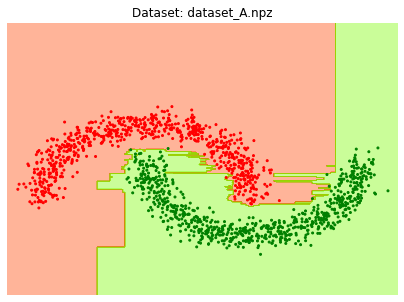

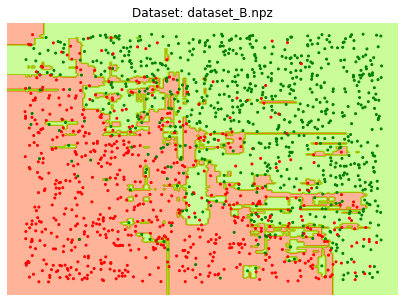

In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

for i in ["dataset_A.npz","dataset_B.npz"]:
  
  d = np.load("../../Data/"+i)
  X_train = d["arr_0"]
  Y_train = d["arr_1"]
  
  X,Y = np.meshgrid(np.arange(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,0.01), np.arange(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,0.01))
  z = (np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1))
  Y_pred = eval_random_forest(best_forests_accuracy[i],z)
  Y_pred = Y_pred.reshape(X.shape)
  plt.figure(figsize=(7,5))
  plt.axis("off")
  plt.title("Dataset: "+str(i))
  plt.contourf(X,Y,Y_pred, colors = ['orangered','lawngreen'], alpha = 0.4, extend = 'both')
  cmap_ = ['red' if i==-1 else 'green' for i in Y_train]
  plt.scatter(X_train[:,0],X_train[:,1],s = 4,color = cmap_)
  plt.show()
  

# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)


class node:
  def __init__(self,feature=None,threshold=None,left = None,right = None,*,puresplit = None):
    self.left = left
    self.right = right
    self.feature = feature
    self.thresh = threshold
    self.puresplitvalue = puresplit
  
  def isleaf(self):
    if self.puresplitvalue == None:
      return False
    else:
      return True






class DecisionTree_AdaBoost:
  
  def __init__(self, maxdepth, min_node_size = 1, criteria = 'accuracy'):
    self.maxdepth = maxdepth
    self.min_node_size = min_node_size
    self.criteria = criteria
    self.root =  None

  

 

  def accuracy(self,X,Y,weights):
   
    best_feature = None
    best_thresh = None
    n_features = X.shape[1]
    best_acc = -1
    for i in range(n_features):

      possible_thresh = np.linspace(min(X[i]),max(X[i]),10)[1:-1]
      if len(np.unique(possible_thresh)) ==1:
        continue

      for thresh in possible_thresh:
        Y_left = np.array(Y[X[i] <= thresh]).flatten()
        Y_right = np.array(Y[X[i] > thresh]).flatten()
        X_left = X[X[i] <= thresh]
        X_right = X[X[i] > thresh]
        weights_left = weights[X[i] <= thresh]
        weights_right = weights[X[i] > thresh]

        weights_left = np.array(weights_left).flatten()
        weights_right = np.array(weights_right).flatten()
        y_weight_left = np.multiply(Y_left, weights_left)
        y_weight_right = np.multiply(weights_right,Y_right)
        # accuracy if left is assigned -1 

        
        Y_pred_left = -np.ones(Y_left.shape[0])
        Y_actual_left = np.sign(y_weight_left)
        b_l = [weights_left[i] if list(Y_pred_left == Y_actual_left )[i] == True else 0 for i in range(len(list(Y_pred_left == Y_actual_left)))]
        count1 =   np.array(b_l).sum()
        Y_pred_right = np.ones(Y_right.shape[0])
        Y_actual_right = np.sign(y_weight_right)
        b_r  = [weights_right[i] if list(Y_pred_right == Y_actual_right )[i] == True else 0 for i in range(len(list(Y_pred_right == Y_actual_right)))]
        count2 =   np.array(b_r).sum()
        acc1 = (count1+count2)/(weights[0].sum())
        acc2 = 1-acc1
        
        
        if acc1>=acc2:
          if acc1 > best_acc:
            best_acc = acc1
            best_feature = i
            best_thresh = thresh
        else:
          if acc2 > best_acc:
            best_acc = acc2
            best_feature = i
            best_thresh = thresh

        
    return best_feature, best_thresh 



  def buildtree(self,X,Y,depth,weights):


    nsamples = X.shape[0]
    labels = len(Y[0].unique())


    if (nsamples <= self.min_node_size) or (depth >= self.maxdepth):
      puresplitvalue = Y[0].mode()[0]
      return node(puresplit=puresplitvalue)
    
    if labels == 1:
      puresplitvalue = Y[0].mode()[0]
      return node(puresplit=puresplitvalue)

    if self.criteria == 'accuracy':
      best_feature,best_thresh   = self.accuracy(X,Y,weights)

    if self.criteria == 'entropy':
      best_feature,best_thresh   = self.accuracy(X,Y,weights)
    
    
    
    X_left = X[X[best_feature]<=best_thresh]
    X_right = X[X[best_feature]>best_thresh]
    Y_left = Y[X[best_feature]<=best_thresh]
    Y_right = Y[X[best_feature]>best_thresh]
    wl= weights[X[best_feature]<=best_thresh]
    wr = weights[X[best_feature]>best_thresh]
    
    
    left = self.buildtree(X_left,Y_left,depth+1,wl)
        
    right = self.buildtree(X_right,Y_right,depth+1,wr)
    
    return node(feature=best_feature,threshold=best_thresh,left=left,right=right) 
  
  def traversetree(self,node,xt):

    
    if node.isleaf() == True:
      return node.puresplitvalue
    

    if xt[node.feature] <= node.thresh :
      return self.traversetree(node.left,xt)
    else:
      return self.traversetree(node.right,xt)
    
    
  
  
  
  
  def predict(self,X_test):
    # X_test is a numpy array
    X_test = np.array(X_test)
    y_pred = np.array([])
    for xt in X_test:
      pred = self.traversetree(self.root,xt)
      y_pred = np.append(y_pred,pred)

    return y_pred
    

  
  def fit(self,X,Y,weights):

    X = pd.DataFrame(X)
    Y = pd.DataFrame(Y)
    weights = pd.DataFrame(weights)

    self.root = self.buildtree(X,Y,0,weights)


def calc_accuracy(Y_test,Y_pred,weights):
  Y_test  = np.array(Y_test)
  Y_pred  = np.array(Y_pred)
  weights = np.array(weights)
  c = [weights[i] if list(Y_test==Y_pred)[i] == True else 0 for i in range(len(list(Y_test==Y_pred)))]
  c = np.array(c)
  c_ = c.sum()
  return (c_)/(weights.sum())  

    



    

def eval_decision_tree(tree, test_X):
  """ Takes in a tree, and a bunch of instances X and 
  returns the tree predicted values at those instances."""
  y_pred = tree.predict(test_X)
  return y_pred





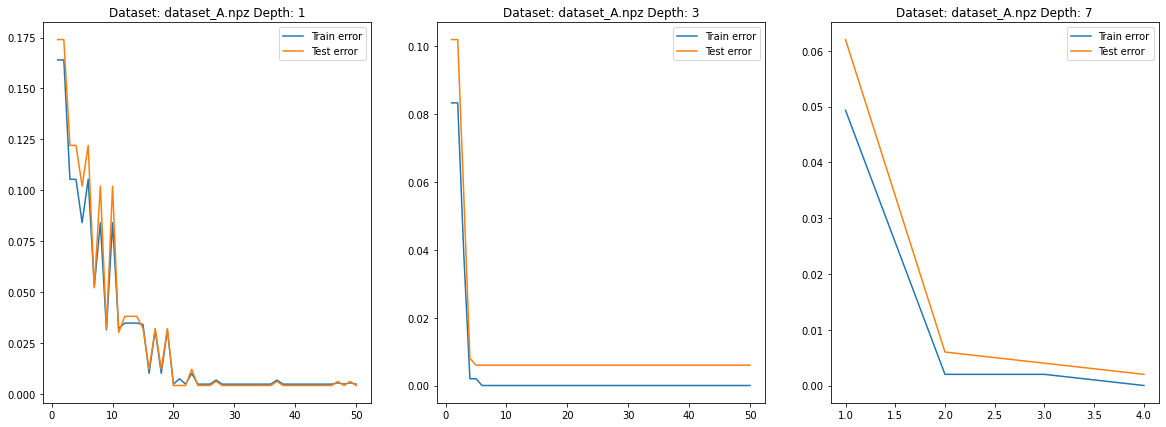

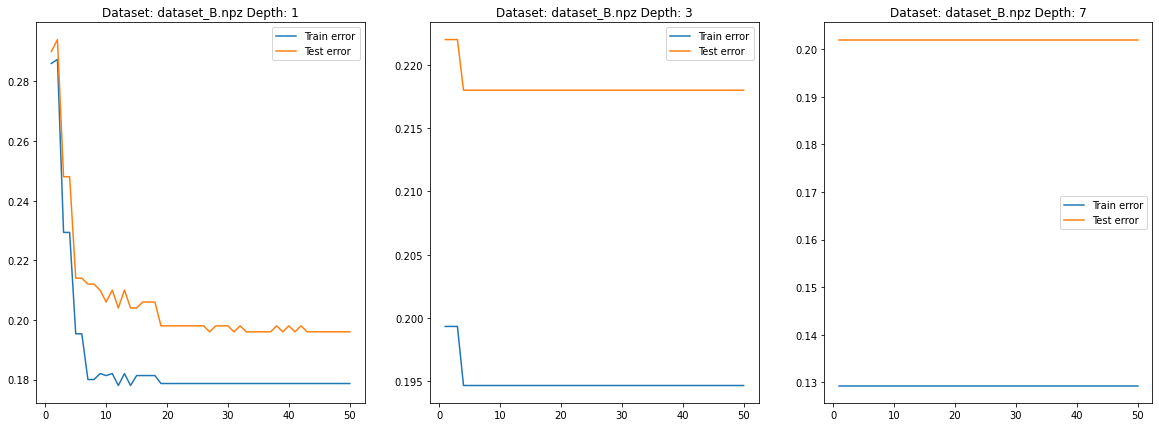

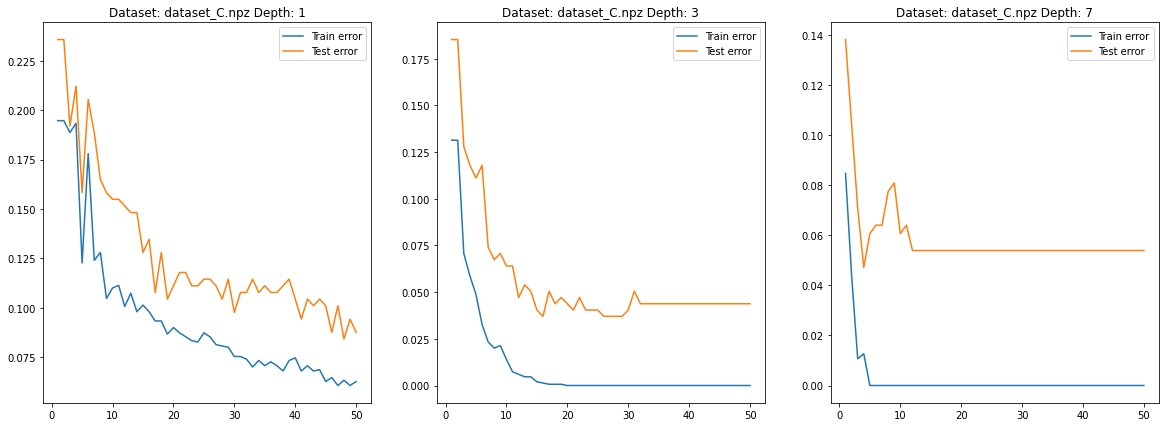

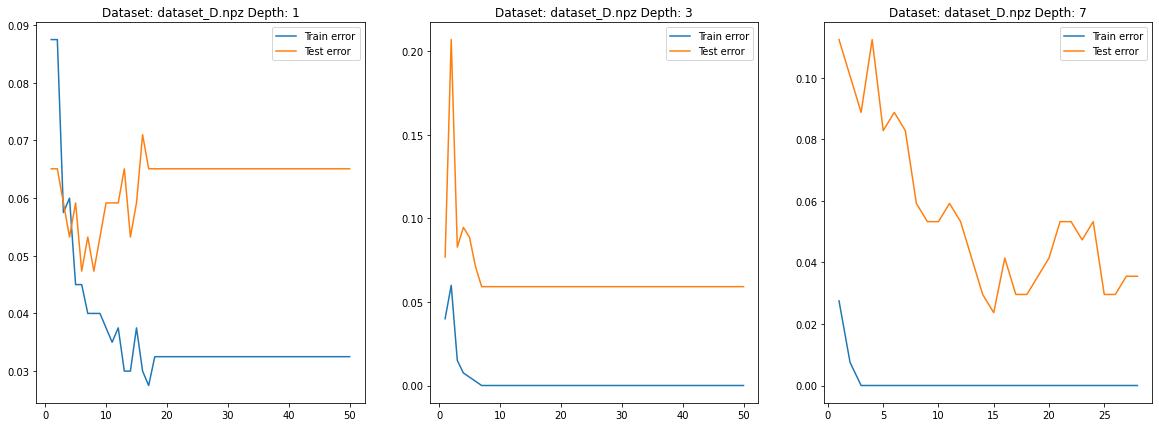

In [ ]:
# Codewrite cell 
# Plots for iteration vs error here

def get_accuracy(X,Y,learner,beeta):
  
  Y_pred = []
  for x in X:
    sum = 0
    for l in range(len(learner)):
      y_predict = eval_decision_tree(learner[l],[x])
      sum = sum+ (beeta[l]*y_predict[0])
    Y_pred.append(np.sign(sum))

  Y_pred = np.array(Y_pred)
  acc = list(Y_pred==Y).count(True)/len(list(Y_pred==Y))

  return acc



train_data_dict = {"dataset_A.npz":[],"dataset_B.npz":[],"dataset_C.npz":[],"dataset_D.npz":[]}
test_data_dict ={"dataset_A.npz":[],"dataset_B.npz":[],"dataset_C.npz":[],"dataset_D.npz":[]}

for setdata in ["dataset_A.npz","dataset_B.npz","dataset_C.npz","dataset_D.npz"]:
  
  
  
  a = 1
  
  for depth in [1,3,7]:
    d1 = np.load("../../Data/"+setdata)
    X_train = d1["arr_0"]
    Y_train = d1["arr_1"]
    X_test = d1["arr_2"]
    Y_test = d1["arr_3"]
    weights = np.ones(X_train.shape[0])
    misclassified = []
    learner = []
    beeta = []
    train_acc_iter = []
    test_acc_iter = []
    for i in range(50): 
      clf1 = DecisionTree_AdaBoost(maxdepth=depth, min_node_size = 1, criteria = 'accuracy')
      clf1.fit(X_train,Y_train,weights)
      learner.append(clf1)
      y_predict = eval_decision_tree(clf1,X_train)
      accuracy = calc_accuracy(np.array(Y_train).flatten(),y_predict,weights)
      gamma = accuracy-0.5 
      if gamma == 0.5:
        del learner[-1]
        break
      beta = (0.5+gamma)/(0.5-gamma)
      beeta.append((np.log(beta)))
      misclassified = [beta if i==False else 1 for i in list(y_predict == Y_train)]
      weights = np.multiply(misclassified,weights)


      train_acc_iter.append(1-get_accuracy(X_train,Y_train,learner,beeta))
      test_acc_iter.append(1-get_accuracy(X_test,Y_test,learner,beeta))
      
    train_data_dict[setdata].append(train_acc_iter)
    test_data_dict[setdata].append(test_acc_iter) 

    
    




for i in ["dataset_A.npz","dataset_B.npz","dataset_C.npz","dataset_D.npz"]:
  fig = plt.figure(figsize=(20,7))
  a = 1
  for j in range(3):
    depth =0
    if j==0:
      depth = 1
    elif j==1:
      depth = 3
    else:
      depth = 7
    
    train_error = train_data_dict[i][j]
    test_error = test_data_dict[i][j]
    ax1 = fig.add_subplot(1,3,a)
    ax1.title.set_text("Dataset: "+i+" Depth: "+str(depth))
    ax1.plot(np.arange(1,len(train_error)+1),train_error,label = "Train error")
    ax1.plot(np.arange(1,len(test_error)+1),test_error,label = "Test error")
    ax1.legend()
    a = a+1



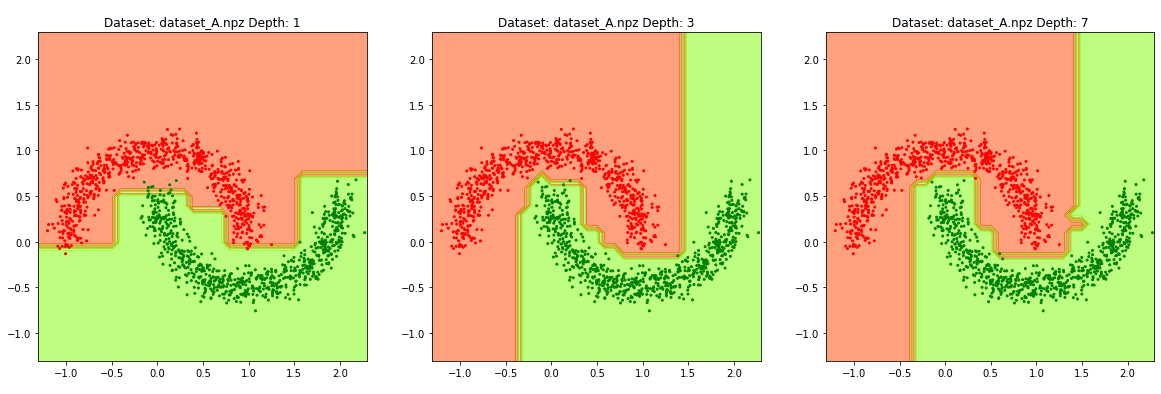

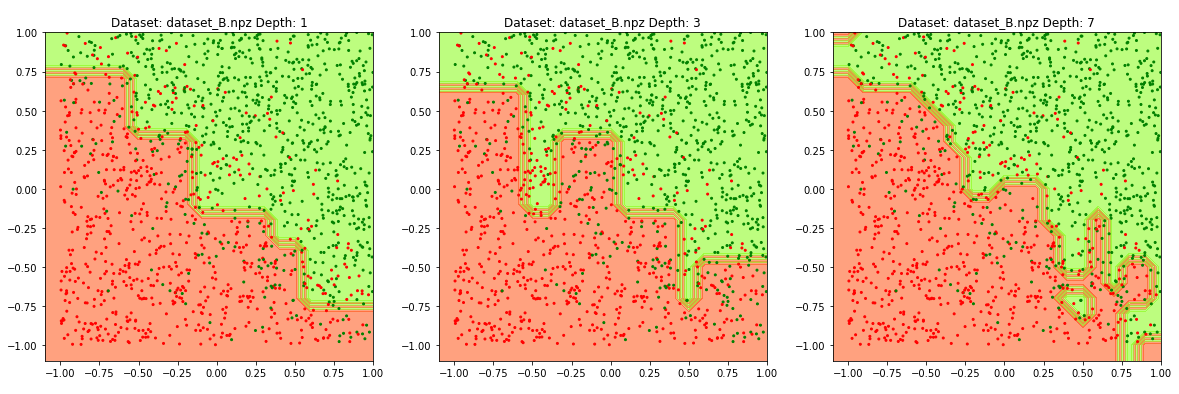

In [ ]:
# Codewrite cell 
# Plots for illustrating the classifier here


for setdata in ["dataset_A.npz","dataset_B.npz"]:
  
  fig = plt.figure(figsize=(20,7))
  plt.axis('off')
  a = 1
  for depth in [1,3,7]:
    d1 = np.load("../../Data/"+setdata)
    X_train = d1["arr_0"]
    Y_train = d1["arr_1"]
    weights = np.ones(X_train.shape[0])
    misclassified = []
    learner = []
    beeta = []

    for i in range(50): 
      clf1 = DecisionTree_AdaBoost(maxdepth=depth, min_node_size = 1, criteria = 'accuracy')
      clf1.fit(X_train,Y_train,weights)
      learner.append(clf1)
      y_predict = eval_decision_tree(clf1,X_train)
      accuracy = calc_accuracy(np.array(Y_train).flatten(),y_predict,weights)
      gamma = (accuracy-0.5) 
      if gamma == 0.5:
        del learner[-1]
        break
      beta = (0.5+gamma)/(0.5-gamma)
      beeta.append(np.log(beta))
      misclassified = [beta if i==False else 1 for i in list(y_predict == Y_train)]
      weights = np.multiply(misclassified,weights)

    y_pred = []
    X,Y = np.meshgrid(np.arange(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,0.1), np.arange(min(X_train[:,0])-0.1,max(X_train[:,0])+0.1,0.1))
    z = (np.concatenate((X.reshape((-1,1)),Y.reshape(-1,1)),axis = 1))
    for x in z:
      sum = 0
      for l in range(len(learner)):
        y_predict = eval_decision_tree(learner[l],[x])
        sum = sum+ (beeta[l]*y_predict[0])
      y_pred.append(np.sign(sum))

    y_pred = np.array(y_pred)
    y_pred = y_pred.reshape(X.shape)
    ax1 = fig.add_subplot(1,3,a)

    ax1.set(adjustable='box', aspect='equal')
    ax1.title.set_text("Dataset: "+setdata+" Depth: "+str(depth))
    
    ax1.contourf(X,Y,y_pred, colors = ['orangered','lawngreen'], alpha = 0.5, extend = 'both')
    cmap_ = ['red' if i==-1 else 'green' for i in Y_train]
    ax1.scatter(X_train[:,0],X_train[:,1],color = cmap_,s = 4)
    a = a+1

  plt.show()



Textwrite cell:


From the above plots, we observe that, as the depth of the tree increases, the adaboost algorithm, did better and better with the training samples. From the above plots it is evident that adboost algorithm when run on a weak classifier(decision tree with depth 1,3,7) is able to generalize the training data better than the decision trees with depth 3 and depth 7. Decision trees with depth 3 and 7 when boosted, have almost over overfitted the data and drove the training error to zero. Some plots for depth 7 have iterations less than 50 as further iterations give a training error of zero and thus continuing will not give us extra benefit and thus has been stopped. From the error vs iterations plot it is clear that the adaboost will drive the training error to zero. Adaboost again did not perform very well on training data of data set B as it exhibited uniform distribution. We must be aware of the stopping criteria for adaboost. The adaboost might drive the training error to zero which might lead to overfitting resulting in poor generalisation of test data.
